# **COURSERA MACHINE LEARNING** #
## *Python Edition* ## 
## *Ex.2_part2 - Regularized Logistic Regression* ##
***A Jupyter Notebook by Cristiano Esposito ©2021***

<p> In this excercise we are going to load data as results coming from testing some microchips.This time the values are not linearly separated so we are first going to map new feature and then the Regularized Logistic Regression algorithm will be used to train the model. The model accurancy will be verified and then we are also going to plot the decision boundary.

In the next section we'll first import all the libraries needed for further use

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

Now we define the main functions that will be used for later computations.

In [2]:
# define plot visualization function
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    p1 = plt.scatter(X[pos, 0], X[pos, 1], marker='x', c='b', label='y = 1')
    p2 = plt.scatter(X[neg, 0], X[neg, 1], marker='o', c='y', label='y = 0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    return plt, p1, p2

In [3]:
# define function to plot decision boundary
def plotDecisionBoundary(theta, X, y):
    # compute values for decision boundary line
    plt, p1, p2 = plotData(X[:, 1:3], y)
    if X.shape[1] <= 3:
        x_values = [np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2]
        y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
        p3 = plt.plot(x_values, y_values, label='Decision Boundary', c='g')
        plt.legend()
        plt.show()
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((len(u), len(v)))
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i, j] = np.dot(mapFeature(np.array([u[i]]), np.array([v[j]])), theta)
        z = np.transpose(z)  # important to transpose z before calling contour
        # Plot z = 0
        # Notice you need to specify the level 0
        # we get collections[0] so that we can display a legend properly
        p3 = plt.contour(u, v, z, levels=[0]).collections[0]
        plt.legend((p1, p2, p3), ('y = 1', 'y = 0', 'Decision Boundary'))
        plt.show()

In [4]:
# define function to maps the two input features to quadratic features
# to be used in regularized cost function (6th grade)
def mapFeature(X1, X2):
    X1.shape = (X1.size, 1)
    X2.shape = (X2.size, 1)
    degree = 6
    out = np.ones(shape=(X1[:, 0].size, 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (X1 ** (i - j)) * (X2 ** j)
            out = np.append(out, r, axis=1)
    return out

In [5]:
# define Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
# define Regularized Cost Function for Logistic Regression 
def lrcostFunctionReg(theta, X, y, lambda_t):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    reg_term = (lambda_t / (2 * m)) * (np.dot(theta[1:].T, theta[1:]))
    J = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) + reg_term
    return J

In [7]:
# define Gradient for Logistic Regression
def gradient(theta, X, y, lambda_t):
    m = len(y)
    grad = (1 / m) * np.dot(X.T, (sigmoid(np.dot(X, theta))) - y)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [8]:
# define prediction function
def predict(theta, X):
    h = sigmoid(np.dot(X, theta))
    p = (h >= 0.5)
    return p

We'll now load data from external dataset and put values in appropriate arrays.

In [9]:
# import data from external file
X1, X2, y = np.loadtxt('./data/ex2data2.txt', delimiter=',', unpack=True)
X1 = X1.reshape(-1, 1)
X2 = X2.reshape(-1, 1)
y = y.reshape(-1, 1)
X = np.concatenate((X1, X2), axis=1)

Let's now show our training data on a scatter plot.

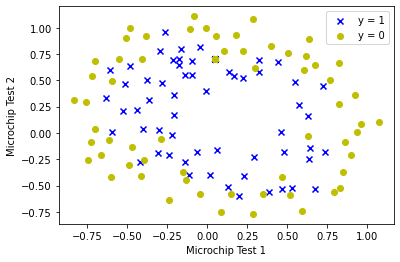

In [10]:
# show scatter plot
plotData(X, y)
plt.legend()
plt.show()

Since our training set is not linearly separated, we are gonna use a map feature function to increase variable in our dataset for proper fitting. There is no need to add intercept values to our set.

In [11]:
X = mapFeature(X[:, 0], X[:, 1])
# define size of matrix X
(m, n) = np.shape(X)

Let's do some initial and test computation on the Cost Function for logistic regression, using an initial theta and a test theta. We are going to use the regularized function so also a parameter Lambda will be set.

In [12]:
# Compute cost with initial theta (zeros)
initial_theta = np.zeros((n, 1))
# Set regularization parameter Lambda
lmbda = 1
cost = lrcostFunctionReg(initial_theta, X, y, lmbda)
grad = gradient(initial_theta, X, y, lmbda)
print('Cost at initial theta (zeros): ', cost)
print('Gradient at initial theta (zeros) - first five values only: \n', grad[0:5])

# Compute cost with non-zero test theta and lambda = 10
test_theta = np.ones((n, 1))
cost = lrcostFunctionReg(test_theta, X, y, 10)
grad = gradient(test_theta, X, y, 10)
print('Cost at test theta: ', cost)
print('Gradient at test theta: \n', grad[0:5])

Cost at initial theta (zeros):  [[0.69314718]]
Gradient at initial theta (zeros) - first five values only: 
 [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]
Cost at test theta:  [[3.16450933]]
Gradient at test theta: 
 [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


Now we use an optimization function, provided by the Scipy library, to mimize cost finding the optimal theta values.

In [13]:
# Compute optimal theta using optimization function fmin_tnc
# where func is our cost function and fprime is the gradient function
result = opt.fmin_tnc(func=lrcostFunctionReg, fprime=gradient, x0=initial_theta, args=(X, y.flatten(), lmbda))
theta = result[0]
print('Optimal theta found: \n', theta)
theta_opt = theta.reshape(-1, 1)
print('Cost for optimal theta is: \n', lrcostFunctionReg(theta_opt, X, y, lmbda), ' with Lambda = ', lmbda)


Optimal theta found: 
 [ 1.27271025  0.62529964  1.18111686 -2.01987399 -0.91743189 -1.43166927
  0.12393228 -0.36553118 -0.35725405 -0.17516292 -1.45817009 -0.05098418
 -0.61558558 -0.27469165 -1.19271299 -0.24217841 -0.20603303 -0.04466177
 -0.27778947 -0.29539513 -0.45645982 -1.04319154  0.02779373 -0.29244865
  0.01555759 -0.32742404 -0.14389149 -0.92467488]
Cost for optimal theta is: 
 [[0.52900273]]  with Lambda =  1


In the next section we're going to use our model to make some predictions and verify the accurancy.

In [14]:
# Check for train accurancy
p = predict(theta, X)
print('Train Accurancy: ', np.mean((p == y.flatten()) * 100), ' with Lambda = ', lmbda)


Train Accurancy:  83.05084745762711  with Lambda =  1


And now let's plot the decision boundary on top of our training set.

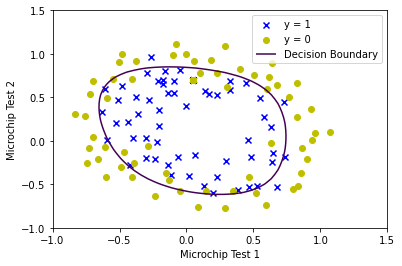

In [15]:
# Plot DecisionBoundary
plotDecisionBoundary(theta, X, y)